<a href="https://colab.research.google.com/github/jbwenjoy/000545000/blob/jbw/CIS_545_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIS 5450 Final Project - Spring 2025**
## Group Member:
Yiyan Liang: edgarl@seas.upenn.edu
<br>Bowen Jiang: jbwenjoy@seas.upenn.edu
<br>Binglong Bao: binglong@seas.upenn.edu

# **1. Introduction and Background**

## **1.1 Problem Statement**
Airfare pricing in the U.S. domestic airline industry has long been a topic of interest due to its dynamic and opaque nature. From 1993 to 2024, the industry has undergone substantial changes including fluctuating fuel prices, shifting market competition, and evolving consumer behavior. These factors make it difficult for travelers to anticipate ticket prices and for airlines to optimize revenue through effective pricing strategies.

Despite the abundance of large-scale data, there remains a lack of comprehensive, data-driven analyses that systematically explore the relationship between these variables and airfare trends. One of our team members is planning to book a flight during a holiday period and is particularly interested in understanding what drives changes in ticket prices. This curiosity sparked our interest and motivated us to investigate whether historical data could reveal meaningful patterns that help consumers make more informed travel decisions.

## **1.2 Objective and Value Proposition**
The objective of this project is to conduct a thorough exploratory data analysis (EDA) of U.S. domestic airline fares from 1993 to 2024, and to develop predictive models that capture how different variables affect airfare pricing. The project integrates route and fare data with external economic indicators such as oil prices to uncover insights into airfare dynamics.

The primary goals are:

- **Understand Key Drivers of Pricing:** Investigate how factors like route distance, seasonality, fuel costs, airline competition, and passenger volume affect airfares.

- **Support Strategic Planning:** Provide insights to airline operators and policymakers for optimizing pricing strategies and understanding long-term market shifts.

- **Build a Predictive Model:** Develop regression models capable of forecasting average fares given known market and economic conditions.

The value proposition of this project lies in offering a systematic and scalable framework for analyzing complex fare-setting behavior across three decades. For consumers, it may lead to better fare predictions and smarter booking decisions. For industry stakeholders, it provides tools for data-informed pricing and long-term planning.

# **2. Data Loading and Preprocessing**



## **2.1 📊 Overview of the Dataset**
This project uses two complementary datasets to explore the relationship between airline ticket pricing and external economic factors, particularly oil prices. The integration of these datasets allows for a data-driven analysis of historical fare trends in the U.S. domestic airline market over the past three decades.
### **✈️ US Airline Flight Routes and Fares (1993–2024)**
**Source**: [Kaggle Dataset – US Airline Flight Routes and Fares (1993–2024)](https://www.kaggle.com/datasets/bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024)

This dataset provides detailed information on airline flight routes, average fares, passenger volume, and carrier competition across the United States.

**Key Features:**
- **Year & Quarter**: Time identifiers for each record, from 1993 to 2024.
- **City1 & City2**: Names of origin and destination cities.
- **Airport Codes**: Origin and destination airport identifiers.
- **nsmiles**: Distance between airports in miles.
- **Passengers**: Number of passengers on each route.
- **Fare**: Average fare for the route.
- **Carrier Info**: Largest and lowest-fare carrier codes, their market shares, and corresponding fares.
- **Geographical Coordinates**: Latitude and longitude of both origin and destination cities.


The dataset enables long-term trend analysis of pricing behavior, route dynamics, and airline competition in the domestic travel sector.

---

### **🛢️ WTI Crude Oil Daily Prices**

Sourced from [DataHub](https://datahub.io/core/oil-prices), this dataset provides historical daily spot prices for West Texas Intermediate (WTI) crude oil.

**Key Features:**
- **Date**: Daily timestamps for each price record.
- **Price**: The WTI crude oil price in USD per barrel.

This dataset supports economic analysis and helps model the impact of fuel prices on airline operating costs.  

By combining historical airfare and fuel price data, this project aims to:
- Uncover patterns in ticket pricing.
- Investigate the impact of fuel cost fluctuations on airline fares.
- Improve prediction accuracy using external economic indicators.

This integrated approach allows for a richer understanding of pricing behavior and supports more informed consumer and industry decisions.


## **2.2 Data Loading**

Import the relevant libraries for all stages of our report (pre-processing, exploratory data analysis, and model selection). These imports primarily span fundamental libraries such as `pandas`, `matplotlib`, `numpy`, and `sklearn`.




In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import TransformerMixin, BaseEstimator
from statsmodels.formula.api import ols
import statsmodels.api as sm

warnings.filterwarnings('ignore')

In [2]:
# Run this cell to mount your drive (you will be prompted to sign in)
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


❗ ONLY RUN ONE OF THE TWO CELLS BELOW, SEE COMMENTS

In [3]:
"""
RUN THIS CELL IF YOU WANT TO LOAD CACHED DATASETS FROM GOOGLE DRIVE
DO NOT RUN THE NEXT CELL IF YOU DECIDE TO RUN THIS ONE!
"""

# If this is colab env, then mount the drive
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    from google.colab import drive
    drive.mount('/content/drive')

    data_path_in_drive = '/content/drive/MyDrive/CIS545-final/'
    flights_data = '/content/drive/MyDrive/CIS545-final/US Airline Flight Routes and Fares 1993-2024.csv'
    fuel_data = '/content/drive/MyDrive/CIS545-final/flat-ui__data-Fri Mar 28 2025.csv'
    kaggle_key = '/content/drive/MyDrive/CIS545-final/kaggle.json'
else:
    print('Not running on CoLab')
    data_path_in_drive = './'
    flights_data = './US Airline Flight Routes and Fares 1993-2024.csv'
    fuel_data = './flat-ui__data-Fri Mar 28 2025.csv'
    kaggle_key = './kaggle.json'

# Check if these files exists
file_paths = [
    (data_path_in_drive, "Directory"),
    (flights_data, "File"),
    (fuel_data, "File"),
    (kaggle_key, "File")
]
file_exists = True
for path, file_type in file_paths:
    if not os.path.exists(path):
        file_exists = False
        if file_type == "Directory":
            os.makedirs(path)
            print(f"Directory '{path}' created successfully.")
        else:
            print(f"{file_type} '{path}' does not exist.")

    else:
        print(f"{file_type} '{path}' exists.")

Running on CoLab
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directory '/content/drive/MyDrive/CIS545-final/' exists.
File '/content/drive/MyDrive/CIS545-final/US Airline Flight Routes and Fares 1993-2024.csv' does not exist.
File '/content/drive/MyDrive/CIS545-final/flat-ui__data-Fri Mar 28 2025.csv' does not exist.
File '/content/drive/MyDrive/CIS545-final/kaggle.json' does not exist.


In [4]:
"""
RUN THIS CELL IF YOU WANT TO DOWNLOAD ONLINE DATASETS FROM KAGGLE AND DATAHUB
DO NOT RUN THE PREVIOUS CELL IF YOU DECIDE TO RUN THIS ONE!
"""
try:
    file_exists
except NameError:
    file_exists = False
if not file_exists:
    # Create the kaggle directory and
    # (NOTE: Do NOT run this cell more than once unless restarting kernel)
    !mkdir ~/.kaggle

    # Read the uploaded kaggle.json file
    !cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

    # Download flights dataset (DO NOT CHANGE)
    !kaggle datasets download -d bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024
    !unzip /content/us-airline-flight-routes-and-fares-1993-2024

    flights_data = 'US Airline Flight Routes and Fares 1993-2024.csv'
    flights_df = pd.read_csv(flights_data, low_memory=False)

    # Download WTI dataset (DO NOT CHANGE)
    url = "https://datahub.io/core/oil-prices/r/wti-daily.csv"
    oil_df = pd.read_csv(url)
    oil_df.to_csv("flat-ui__data-Fri Mar 28 2025.csv", index=False)
    fuel_data = 'flat-ui__data-Fri Mar 28 2025.csv'

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024
License(s): apache-2.0
us-airline-flight-routes-and-fares-1993-2024.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/us-airline-flight-routes-and-fares-1993-2024.zip
replace US Airline Flight Routes and Fares 1993-2024.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## **2.3 Data Preprocessing**
### 🔍 Identified Data Challenges
- **Missing and Anomalous Values**: Both datasets contain potential null values and outliers that need to be addressed for accurate analysis.
- **Data Integration**: Airfare data is provided on a quarterly basis, while oil prices are reported daily. Proper aggregation and alignment are necessary to merge the two datasets effectively.

---

### 🛠️ Proposed Solutions

- **Outlier Detection and Filtering**: Use statistical thresholds to filter out unreasonable values (e.g., negative fares or extremely long flights).
- **Handling Missing Values**: Apply appropriate methods such as row filtering, median imputation, or interpolation to manage missing entries.
- **Quarter-Based Aggregation**: Convert daily oil price data into quarterly averages to match the structure of the airfare dataset.


### **2.3.1 Flight Data**

In [5]:
df_original = pd.read_csv(flights_data, low_memory=False)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [6]:
# Checking Duplicates
duplicates = df_original.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [7]:
df_original.head()

tbl  Year  quarter  citymarketid_1  citymarketid_2  \
0  Table1a  2021        3           30135           33195   
1  Table1a  2021        3           30135           33195   
2  Table1a  2021        3           30140           30194   
3  Table1a  2021        3           30140           30194   
4  Table1a  2021        3           30140           30466   

                            city1                          city2  airportid_1  \
0  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
1  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
2                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
3                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
4                 Albuquerque, NM                    Phoenix, AZ        10140   

   airportid_2 airport_1  ...    fare  carrier_lg  large_ms  fare_lg  \
0        14112       ABE  ...   81.43          G4    1.0000    81.43   
1        15304       ABE  ...  208.93          DL    0.4659   219.98   
2        11259       ABQ  ...  184.56          WN    0.9968   184.44   
3        11298       ABQ  ...  182.64          AA    0.9774   183.09   
4        14107       ABQ  ...  177.11          WN    0.6061   184.49   

  carrier_low   lf_ms  fare_low Geocoded_City1  Geocoded_City2  \
0          G4  1.0000     81.43            NaN             NaN   
1          UA  0.1193    154.11            NaN             NaN   
2          WN  0.9968    184.44            NaN             NaN   
3          AA  0.9774    183.09            NaN             NaN   
4          AA  0.3939    165.77            NaN             NaN   

                 tbl1apk  
0  202131013514112ABEPIE  
1  202131013515304ABETPA  
2  202131014011259ABQDAL  
3  202131014011298ABQDFW  
4  202131014014107ABQPHX  

[5 rows x 23 columns]

In [8]:
df_original.sample(3)

tbl  Year  quarter  citymarketid_1  citymarketid_2  \
197871  Table 1a  2017        1           30599           31453   
142184  Table 1a  2008        4           30255           30852   
235898   Table1a  2022        4           32575           31703   

                                      city1  \
197871                       Birmingham, AL   
142184                       Huntsville, AL   
235898  Los Angeles, CA (Metropolitan Area)   

                                        city2  airportid_1  airportid_2  \
197871                            Houston, TX        10599        12266   
142184     Washington, DC (Metropolitan Area)        12217        10821   
235898  New York City, NY (Metropolitan Area)        12892        12478   

       airport_1  ...    fare  carrier_lg  large_ms  fare_lg carrier_low  \
197871       BHM  ...  255.67          UA    0.9195   248.81          UA   
142184       HSV  ...  170.49          DL    0.5300   179.50          US   
235898       LAX  ...  513.89          B6    0.3920   402.44          B6   

         lf_ms  fare_low                           Geocoded_City1  \
197871  0.9195    248.81  Birmingham, AL\n(33.522859, -86.807705)   
142184  0.3400    167.06  Huntsville, AL\n(34.729538, -86.585283)   
235898  0.3920    402.44                                      NaN   

                                           Geocoded_City2  \
197871               Houston, TX\n(29.760803, -95.369506)   
142184  Washington, DC (Metropolitan Area)\n(38.892062...   
235898                                                NaN   

                      tbl1apk  
197871  201711059912266BHMIAH  
142184  200841221710821HSVBWI  
235898  202241289212478LAXJFK  

[3 rows x 23 columns]

In [9]:
df_original.describe()

Year        quarter  citymarketid_1  citymarketid_2  \
count  245955.000000  245955.000000   245955.000000   245955.000000   
mean     2008.524124       2.479153    31556.430201    32180.117086   
std         8.703364       1.122149     1089.872880     1232.464184   
min      1993.000000       1.000000    30135.000000    30189.000000   
25%      2001.000000       1.000000    30721.000000    30994.000000   
50%      2008.000000       2.000000    31423.000000    32211.000000   
75%      2016.000000       3.000000    32467.000000    33192.000000   
max      2024.000000       4.000000    35412.000000    35628.000000   

         airportid_1    airportid_2        nsmiles     passengers  \
count  245955.000000  245955.000000  245955.000000  245955.000000   
mean    12437.099986   13249.889525    1189.812319     299.476795   
std      1431.665257    1425.810159     703.143472     511.389486   
min     10135.000000   10466.000000     109.000000       0.000000   
25%     11193.000000   12197.000000     626.000000      21.000000   
50%     12266.000000   13303.000000    1023.000000     113.000000   
75%     13487.000000   14679.000000    1736.000000     339.000000   
max     16440.000000   15919.000000    2724.000000    8301.000000   

                fare       large_ms        fare_lg          lf_ms  \
count  245955.000000  244415.000000  244415.000000  244343.000000   
mean      218.979587       0.665252     218.710963       0.450438   
std        82.372486       0.224635      84.674363       0.332669   
min        50.000000       0.003800      50.000000       0.010000   
25%       164.620000       0.480000     161.500000       0.158000   
50%       209.320000       0.652400     208.030000       0.360000   
75%       262.890000       0.871900     263.640000       0.750000   
max      3377.000000       1.000000    2725.600000       1.000000   

            fare_low  
count  244343.000000  
mean      190.675939  
std        73.577694  
min        50.000000  
25%       140.060000  
50%       181.630000  
75%       230.040000  
max      2725.600000

In [10]:
print(df_original.shape)

# Handling Missing Values
df_clean = df_original.copy()
missing_values = df_clean.isnull().sum()
print("------MISS VALUES------")
print(missing_values.to_string())
df_clean = df_clean.dropna()
df_clean = df_clean.dropna(axis=1)
df_clean = df_clean.drop_duplicates()

print(df_clean.shape)

(245955, 23)
------MISS VALUES------
tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1540
large_ms           1540
fare_lg            1540
carrier_low        1612
lf_ms              1612
fare_low           1612
Geocoded_City1    39206
Geocoded_City2    39206
tbl1apk               0
(205189, 23)


In [11]:
df_clean.describe()

Year        quarter  citymarketid_1  citymarketid_2  \
count  205189.000000  205189.000000   205189.000000   205189.000000   
mean     2006.203344       2.453821    31557.506255    32179.255686   
std         7.357540       1.114433     1087.876837     1230.573397   
min      1993.000000       1.000000    30135.000000    30189.000000   
25%      2000.000000       1.000000    30721.000000    31057.000000   
50%      2006.000000       2.000000    31423.000000    32211.000000   
75%      2012.000000       3.000000    32467.000000    33192.000000   
max      2020.000000       4.000000    35412.000000    35412.000000   

         airportid_1    airportid_2        nsmiles     passengers  \
count  205189.000000  205189.000000  205189.000000  205189.000000   
mean    12442.147869   13253.934041    1187.950392     292.772936   
std      1434.010417    1426.996038     705.472703     498.710148   
min     10135.000000   10466.000000     109.000000       0.000000   
25%     11193.000000   12197.000000     625.000000      21.000000   
50%     12339.000000   13303.000000    1020.000000     111.000000   
75%     13487.000000   14679.000000    1736.000000     332.000000   
max     16440.000000   15919.000000    2724.000000    8023.000000   

                fare      large_ms        fare_lg          lf_ms  \
count  205189.000000  205189.00000  205189.000000  205189.000000   
mean      215.817393       0.65732     216.240639       0.437262   
std        79.491791       0.22495      84.577098       0.329797   
min        50.000000       0.10000      50.000000       0.010000   
25%       161.900000       0.47620     158.860000       0.150000   
50%       206.810000       0.65000     205.450000       0.340000   
75%       260.130000       0.86000     261.200000       0.729700   
max      3377.000000       1.00000    2725.600000       1.000000   

            fare_low  
count  205189.000000  
mean      188.975523  
std        73.010497  
min        50.000000  
25%       139.230000  
50%       179.510000  
75%       227.470000  
max      2725.600000

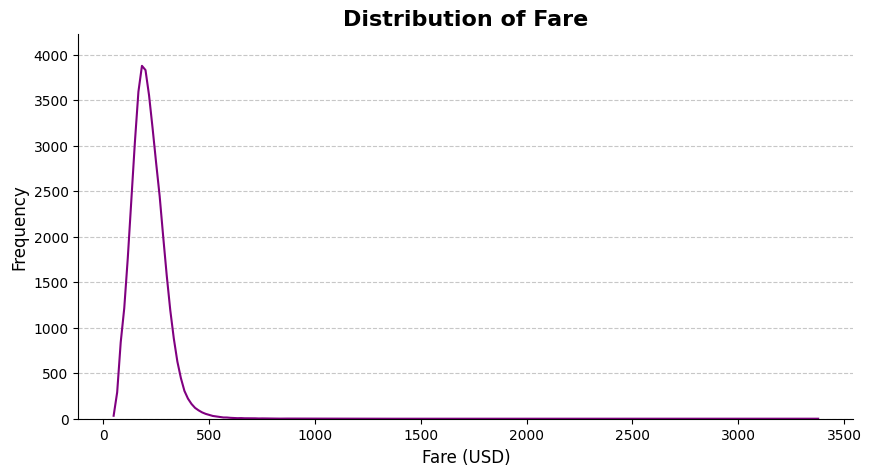

In [12]:
# Have a look at the distribution of fare, to see if there are outliers
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['fare'], kde=True, color='#800080', edgecolor='white', linewidth=1.5)
plt.title('Distribution of Fare', fontsize=16, fontweight='bold')
plt.xlabel('Fare (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added gridlines for better readability
sns.despine()  # Remove top and right spines for a cleaner look
plt.show()

❗ BE CAREFUL: YOU CAN ONLY RUN BELOW ONCE WITHOUT RERUNNING THE CELL ABOVE!

In [13]:
"""
YOU CAN ONLY RUN THIS CELL ONCE!
OR YOU NEED TO RERUN THE CELL ABOVE THIS
"""

# Calculate Z-scores of each value in the DataFrame
z_scores = stats.zscore(df_clean.select_dtypes(include=['float64', 'int64']))

# Identify outliers
outlier_score = 3
df_outliers = df_clean[(z_scores > outlier_score).any(axis=1) | (z_scores < -outlier_score).any(axis=1)]
print(f"Number of rows identified as outliers: {df_outliers.shape[0]}")

# Remove rows with outliers based on Z-score
df_clean = df_clean[(z_scores < outlier_score).all(axis=1) & (z_scores > -outlier_score).all(axis=1)]
print(f"Shape of DataFrame after removing outliers: {df_clean.shape}")
print("Sample rows after cleaning outliers:")
df_clean.sample(3)

Number of rows identified as outliers: 9513
Shape of DataFrame after removing outliers: (195676, 23)
Sample rows after cleaning outliers:


tbl  Year  quarter  citymarketid_1  citymarketid_2  \
182707  Table 1a  2015        2           31703           30198   
24571   Table 1a  2012        3           33244           31703   
59597   Table 1a  2009        3           30721           34614   

                                        city1  \
182707  New York City, NY (Metropolitan Area)   
24571                             Memphis, TN   
59597          Boston, MA (Metropolitan Area)   

                                        city2  airportid_1  airportid_2  \
182707                         Pittsburgh, PA        15070        14122   
24571   New York City, NY (Metropolitan Area)        13244        12197   
59597                      Salt Lake City, UT        10721        14869   

       airport_1  ...    fare  carrier_lg  large_ms  fare_lg carrier_low  \
182707       SWF  ...  254.47          DL      0.42   254.27          US   
24571        MEM  ...  199.99          DL      0.52   207.87          FL   
59597        BOS  ...  284.88          DL      0.61   311.41          US   

        lf_ms  fare_low                                     Geocoded_City1  \
182707   0.30    232.75  New York City, NY (Metropolitan Area)\n(40.123...   
24571    0.18    170.28               Memphis, TN\n(35.143378, -90.052136)   
59597    0.10    204.68  Boston, MA (Metropolitan Area)\n(42.358894, -7...   

                                           Geocoded_City2  \
182707            Pittsburgh, PA\n(40.442169, -79.994945)   
24571   New York City, NY (Metropolitan Area)\n(40.123...   
59597        Salt Lake City, UT\n(40.758478, -111.888142)   

                      tbl1apk  
182707  201521507014122SWFPIT  
24571   201231324412197MEMHPN  
59597   200931072114869BOSSLC  

[3 rows x 23 columns]

### **2.3.2 Fuel Price Data**

In [14]:
fuel_df_original = pd.read_csv(fuel_data, low_memory=False)
fuel_df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9895 entries, 0 to 9894
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9895 non-null   object 
 1   Price   9895 non-null   float64
dtypes: float64(1), object(1)
memory usage: 154.7+ KB


In [15]:
# Checking Duplicates
duplicates = fuel_df_original.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [16]:
fuel_df_original.head()

Date  Price
0  1986-01-02  25.56
1  1986-01-03  26.00
2  1986-01-06  26.53
3  1986-01-07  25.85
4  1986-01-08  25.87

In [17]:
fuel_df_original.sample(3)

Date   Price
7178  2014-06-17  106.95
6017  2009-11-05   79.64
214   1986-11-06   15.08

In [18]:
print(fuel_df_original.shape)

# Handling Missing Values
fuel_df_clean = fuel_df_original.copy()
fuel_df_clean = fuel_df_clean.dropna()
fuel_df_clean = fuel_df_clean.dropna(axis=1)
fuel_df_clean = fuel_df_clean.drop_duplicates()

print(fuel_df_clean.shape)

(9895, 2)
(9895, 2)


Since the fuel price data is very clean, we don't need further cleaning.

# **3. Exploratory Data Analysis (EDA)**

We primarily focused on visualizing data distributions to have a brief concept of the data ranges, and also the relationships between fare and possible deciding factors (fuel price, distance, passenger count, carrier type, etc) to understand possible correlations.

In [19]:
df = df_clean.copy()
fuel_df = fuel_df_clean.copy()

## **3.1 Distribution of Fare, distance and fuel price**

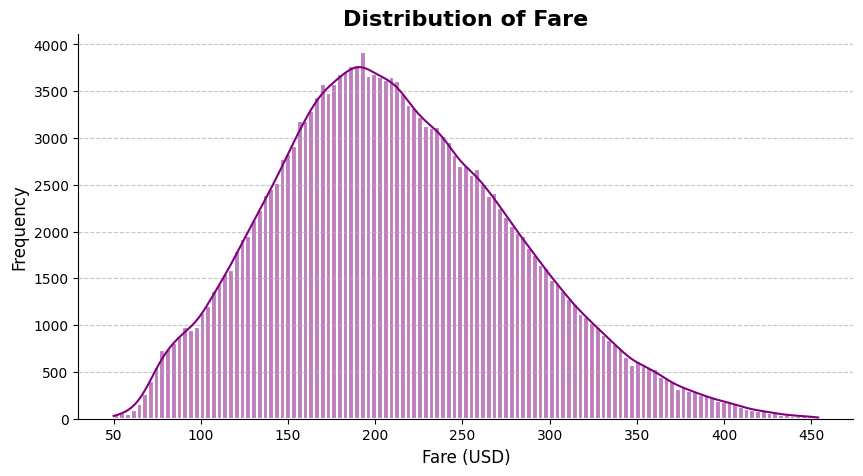

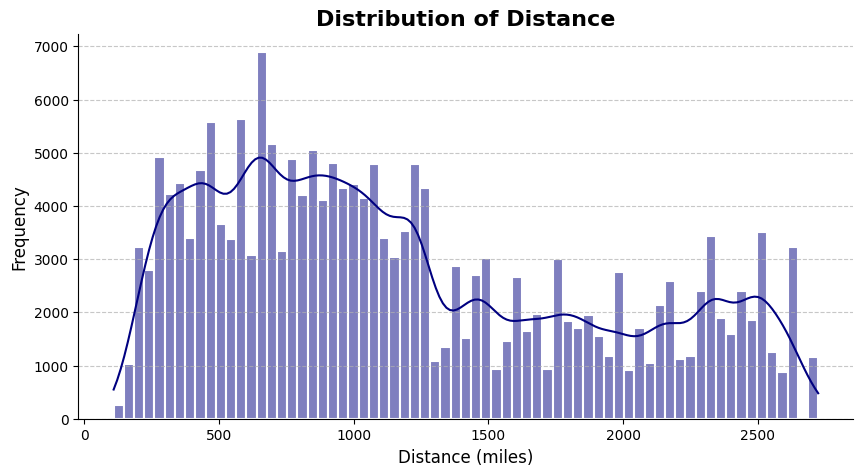

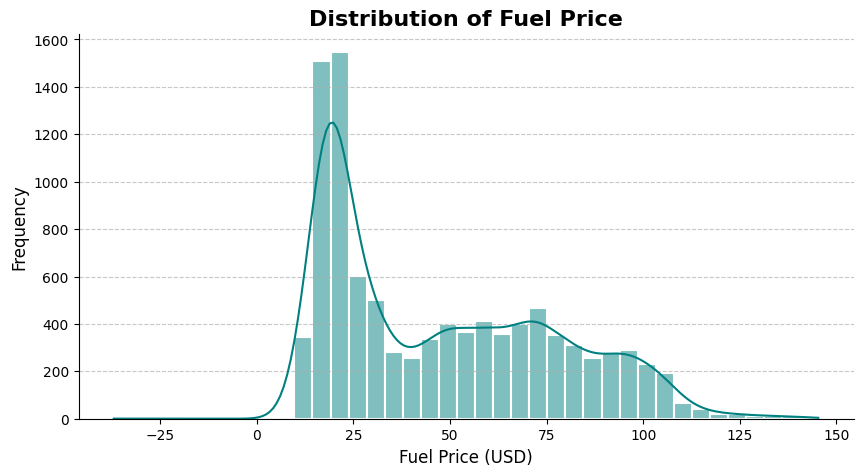

In [20]:
# Distribution of fare
plt.figure(figsize=(10, 5))
sns.histplot(df['fare'], kde=True, color='#800080', edgecolor='white', linewidth=1.5)
plt.title('Distribution of Fare', fontsize=16, fontweight='bold')
plt.xlabel('Fare (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added gridlines for better readability
sns.despine()  # Remove top and right spines for a cleaner look
plt.show()

# Distribution of distance
plt.figure(figsize=(10, 5))
sns.histplot(df['nsmiles'], kde=True, color='#000080', edgecolor='white', linewidth=1.5)
plt.title('Distribution of Distance', fontsize=16, fontweight='bold')
plt.xlabel('Distance (miles)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

# Distribution of fuel price
plt.figure(figsize=(10, 5))
sns.histplot(fuel_df['Price'], kde=True, color='#008080', edgecolor='white', linewidth=1.5)
plt.title('Distribution of Fuel Price', fontsize=16, fontweight='bold')
plt.xlabel('Fuel Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

We can see that:

* Airfare centers around 200 USD, while there are extreme values, it's still very symmetrical.

* Distance range from about 200 miles to over 2500 miles, with 1500 miles serving as a dividing line. The distribution is fairly uniform both below and above 1,500 miles, but the average frequency in these two segments differs by about a factor of two.

* Fuel price ranges greatly over the years.

## **3.2 US Flight Fare and Distance**

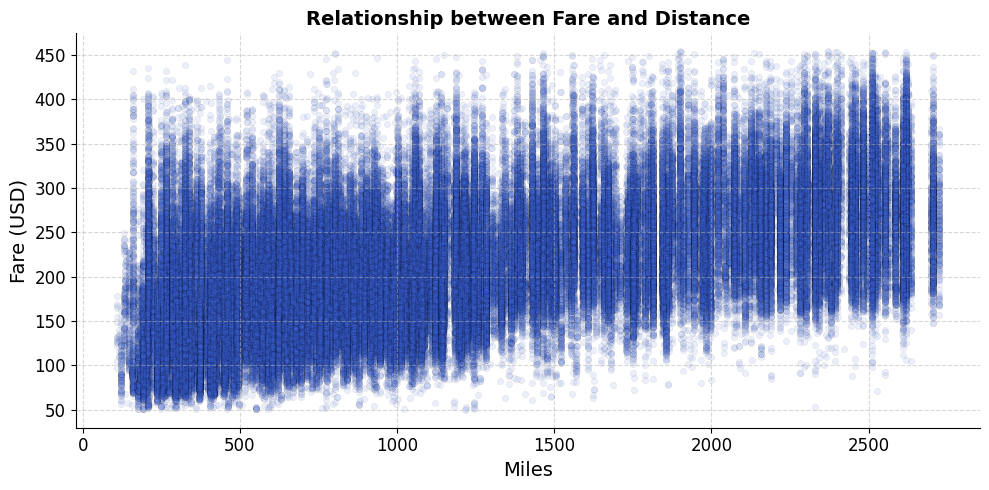

In [21]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='nsmiles', y='fare', data=df, alpha=0.1, color='royalblue', edgecolor='k', s=20)
plt.title('Relationship between Fare and Distance', fontsize=14, fontweight='bold')
plt.xlabel('Miles', fontsize=14)
plt.ylabel('Fare (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

From the plot:

* There is an approximately linear relationship between airfare and the distance of the route.

* The slope is small and the variance is very large. This aligns with our real-world experience that airfare can vary greatly.

## **3.3 US Flight Fare and Fuel Price over Time**

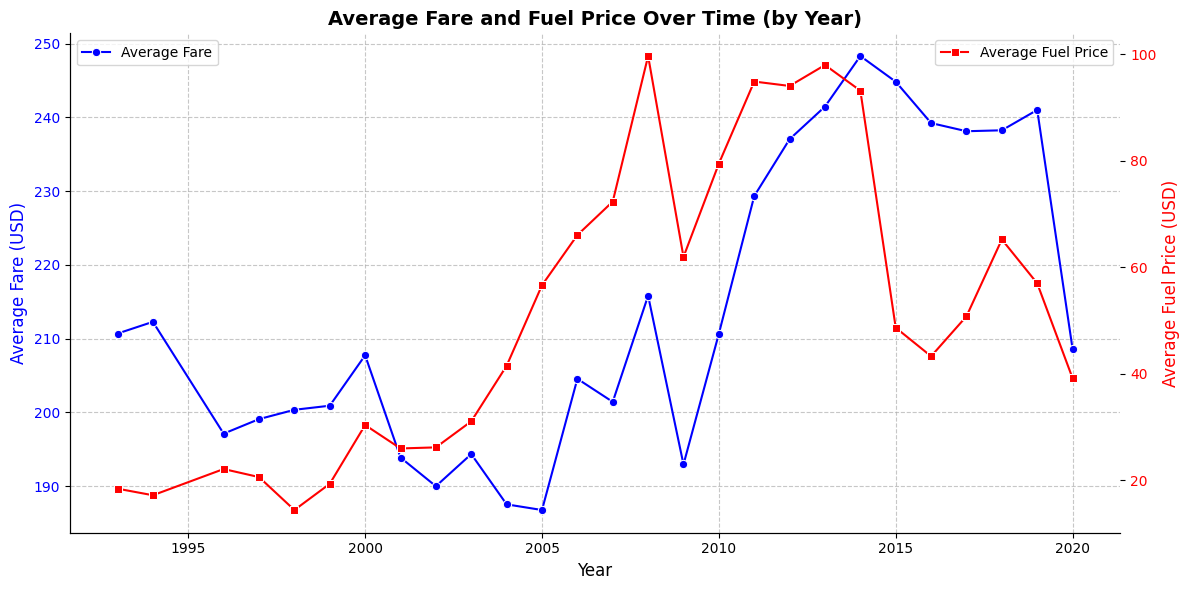

In [22]:
fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])
fuel_df['Year'] = fuel_df['Date'].dt.year
avg_fuel_price_per_year = fuel_df.groupby('Year')['Price'].mean().reset_index()
avg_fare_per_year = df.groupby('Year')['fare'].mean().reset_index()

# Find common years between fare and fuel data
common_years = list(set(avg_fare_per_year['Year']) & set(avg_fuel_price_per_year['Year']))

# Filter data for common years
avg_fare_per_year = avg_fare_per_year[avg_fare_per_year['Year'].isin(common_years)]
avg_fuel_price_per_year = avg_fuel_price_per_year[avg_fuel_price_per_year['Year'].isin(common_years)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Avr fare (ax1)
sns.lineplot(x='Year', y='fare', data=avg_fare_per_year, marker='o', color='blue', ax=ax1, label='Average Fare')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Average Fare (USD)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper left')

# Avr fuel price (ax2)
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Price', data=avg_fuel_price_per_year, marker='s', color='red', ax=ax2, label='Average Fuel Price')
ax2.set_ylabel('Average Fuel Price (USD)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color('red')
plt.title('Average Fare and Fuel Price Over Time (by Year)', fontsize=14, fontweight='bold')
# fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.95))
sns.despine()
plt.tight_layout()

plt.show()

From the plot:

* We can see some correlation between flight ticket fare and fuel price, but averging by year is somewhat rough.

* Below we also plot base on quarterly average, and we can see that the fluctuations of the two are more obvious.

* Airfare tend to change a little bit later/slower than the fuel price.

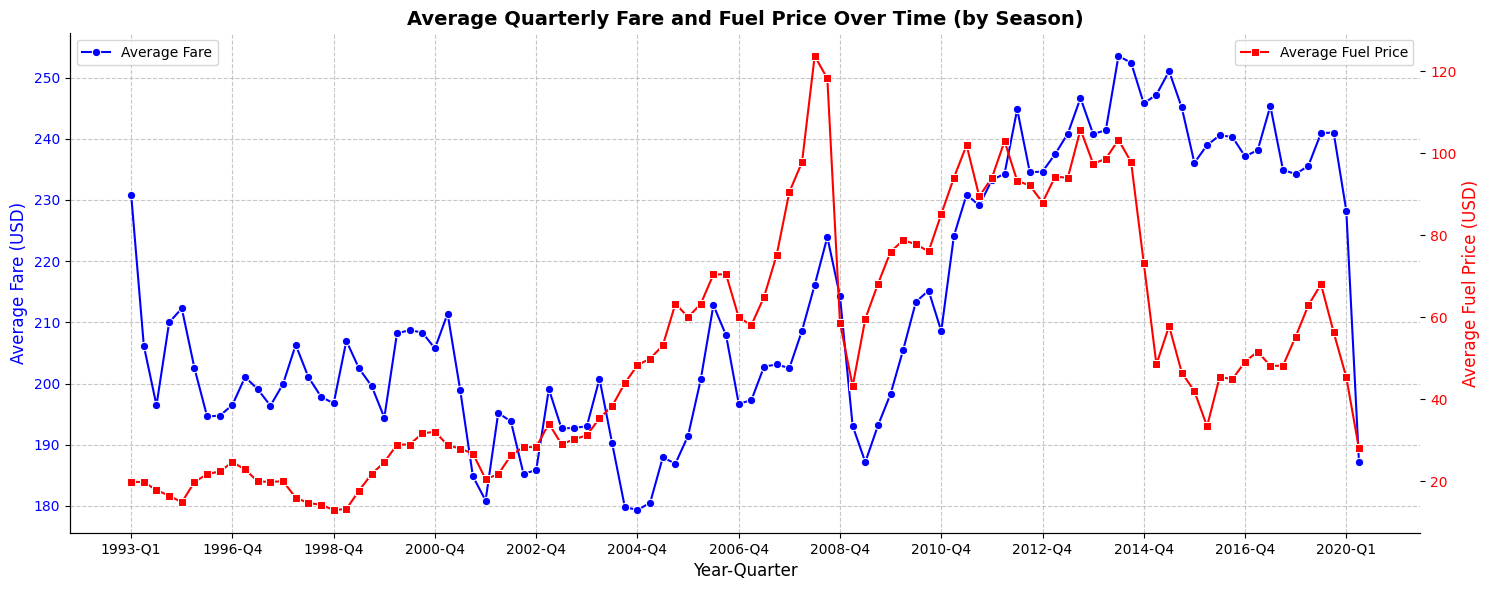

In [23]:
fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])
fuel_df['Year'] = fuel_df['Date'].dt.year
fuel_df['Quarter'] = fuel_df['Date'].dt.quarter
avg_fuel_price_per_quarter = fuel_df.groupby(['Year', 'Quarter'])['Price'].mean().reset_index()

avg_fare_per_quarter = df.groupby(['Year', 'quarter'])['fare'].mean().reset_index()
avg_fare_per_quarter = avg_fare_per_quarter.rename(columns={'quarter': 'Quarter'})

# Merge and filter data for common quarters
merged_df = pd.merge(avg_fare_per_quarter, avg_fuel_price_per_quarter, on=['Year', 'Quarter'], how='inner')
merged_df['Year-Quarter'] = merged_df['Year'].astype(str) + '-Q' + merged_df['Quarter'].astype(str)

fig, ax1 = plt.subplots(figsize=(15, 6))

# Avr flight fare (ax1)
sns.lineplot(x='Year-Quarter', y='fare', data=merged_df, marker='o', color='blue', ax=ax1, label='Average Fare')
ax1.set_xlabel('Year-Quarter', fontsize=12)
ax1.set_ylabel('Average Fare (USD)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper left')

# Avr fuel price (ax2)
ax2 = ax1.twinx()
sns.lineplot(x='Year-Quarter', y='Price', data=merged_df, marker='s', color='red', ax=ax2, label='Average Fuel Price')
ax2.set_ylabel('Average Fuel Price (USD)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add solid line to the right spine of ax2
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color('red')
ax2.legend(loc='upper right')

plt.title('Average Quarterly Fare and Fuel Price Over Time (by Season)', fontsize=14, fontweight='bold')
# fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.95))

plt.xticks(rotation=45)
ax1.xaxis.set_major_locator(plt.MaxNLocator(15)) # Maximum num of x labels

# Improve aesthetics
sns.despine()
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

## **3.4 US Flight Fare and Passenger Count**

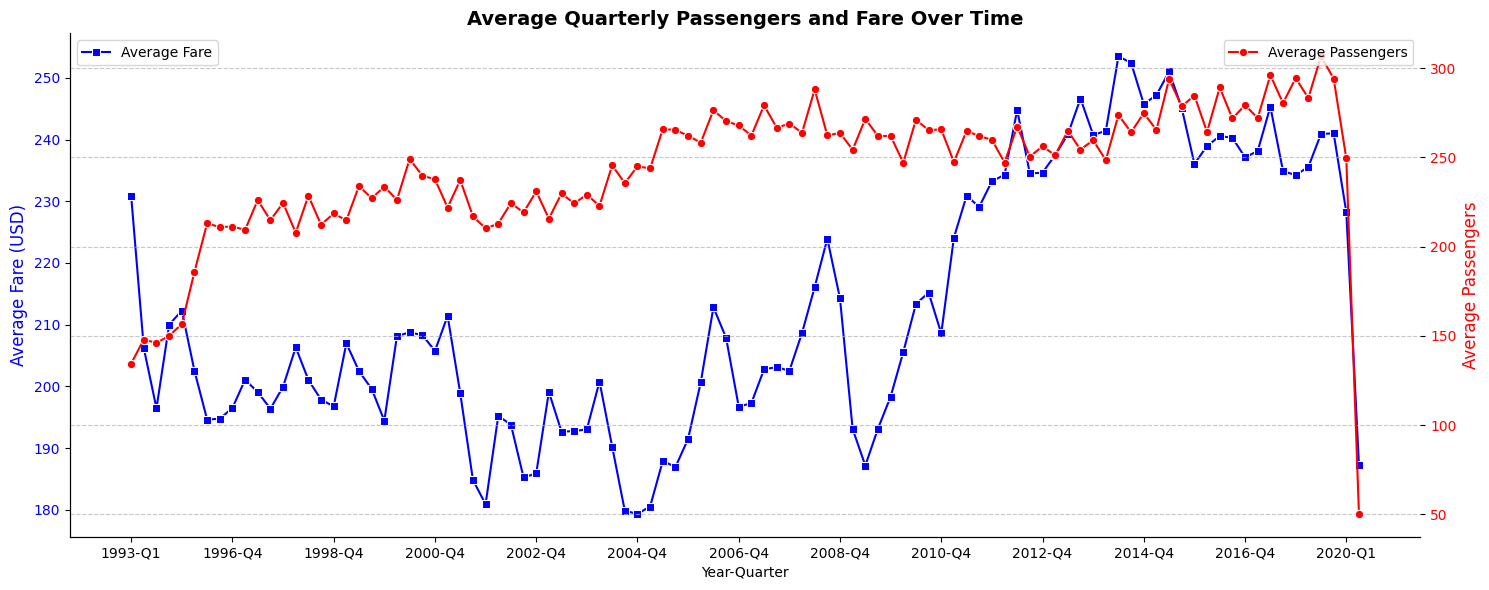

In [24]:
# Averging by quarters
avg_passengers_per_quarter = df.groupby(['Year', 'quarter'])['passengers'].mean().reset_index()
avg_fare_per_quarter = df.groupby(['Year', 'quarter'])['fare'].mean().reset_index()

avg_passengers_per_quarter = avg_passengers_per_quarter.rename(columns={'quarter': 'Quarter'})
avg_fare_per_quarter = avg_fare_per_quarter.rename(columns={'quarter': 'Quarter'})

# Merging
merged_df = pd.merge(avg_passengers_per_quarter, avg_fare_per_quarter, on=['Year', 'Quarter'], how='inner')
merged_df['Year-Quarter'] = merged_df['Year'].astype(str) + '-Q' + merged_df['Quarter'].astype(str)

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 6))
sns.lineplot(x='Year-Quarter', y='fare', data=merged_df, marker='s', color='blue', ax=ax1, label='Average Fare')
ax1.set_ylabel('Average Fare (USD)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
sns.lineplot(x='Year-Quarter', y='passengers', data=merged_df, marker='o', color='red', ax=ax2, label='Average Passengers')
ax2.set_xlabel('Year-Quarter', fontsize=12)
ax2.set_ylabel('Average Passengers', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper right')

ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color('red')

plt.title('Average Quarterly Passengers and Fare Over Time', fontsize=14, fontweight='bold')
# fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.95))
plt.xticks(rotation=45)
ax1.xaxis.set_major_locator(plt.MaxNLocator(15))
sns.despine()
plt.tight_layout()

plt.show()

From the plot:

* Looks like there isn't a strong correlation between flight fare and passenger counts.

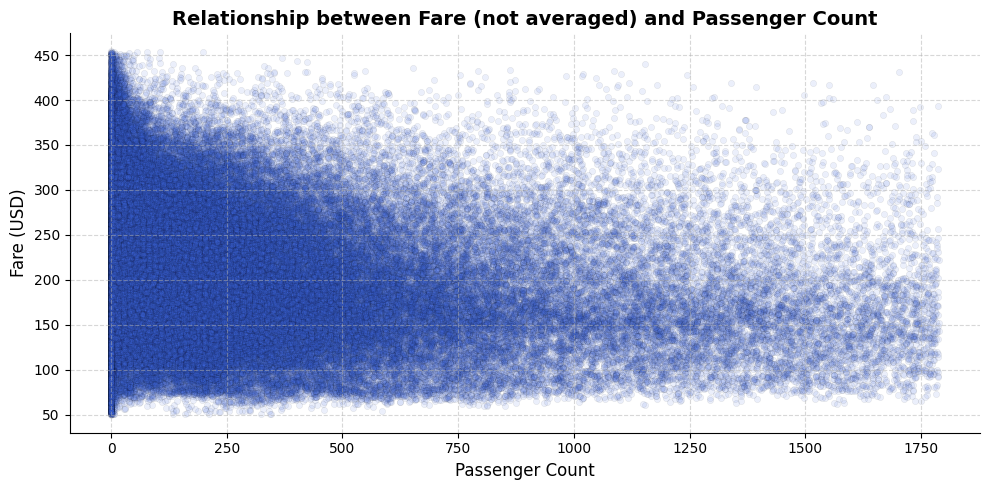

In [25]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='passengers', y='fare', data=df, alpha=0.1, color='royalblue', edgecolor='k', s=20)
plt.title('Relationship between Fare (not averaged) and Passenger Count', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Fare (USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

From the plot:

* We can see that the fares are more stable when there is a high passenger volume on a route.

## **3.5 US Flight Fare and Carrier Type for Same Routes**

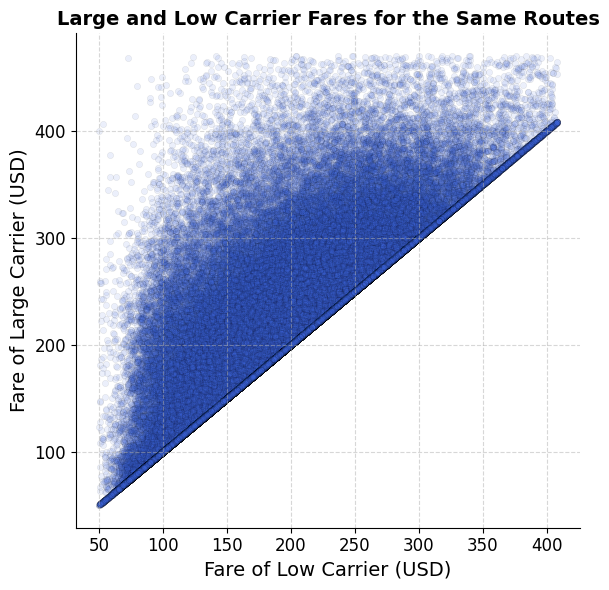

In [26]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='fare_low', y='fare_lg', data=df, alpha=0.1, color='royalblue', edgecolor='k', s=20)
plt.title('Large and Low Carrier Fares for the Same Routes', fontsize=14, fontweight='bold')
plt.xlabel('Fare of Low Carrier (USD)', fontsize=14)
plt.ylabel('Fare of Large Carrier (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

From this plot:

* We can roughly see that for air tickets between about 100-300 USD, the fares of different carriers vary greatly.

* The differences become much smaller after 300 USD.

## **3.6 Top 10 Busiest Cities (Dept/Dest)**

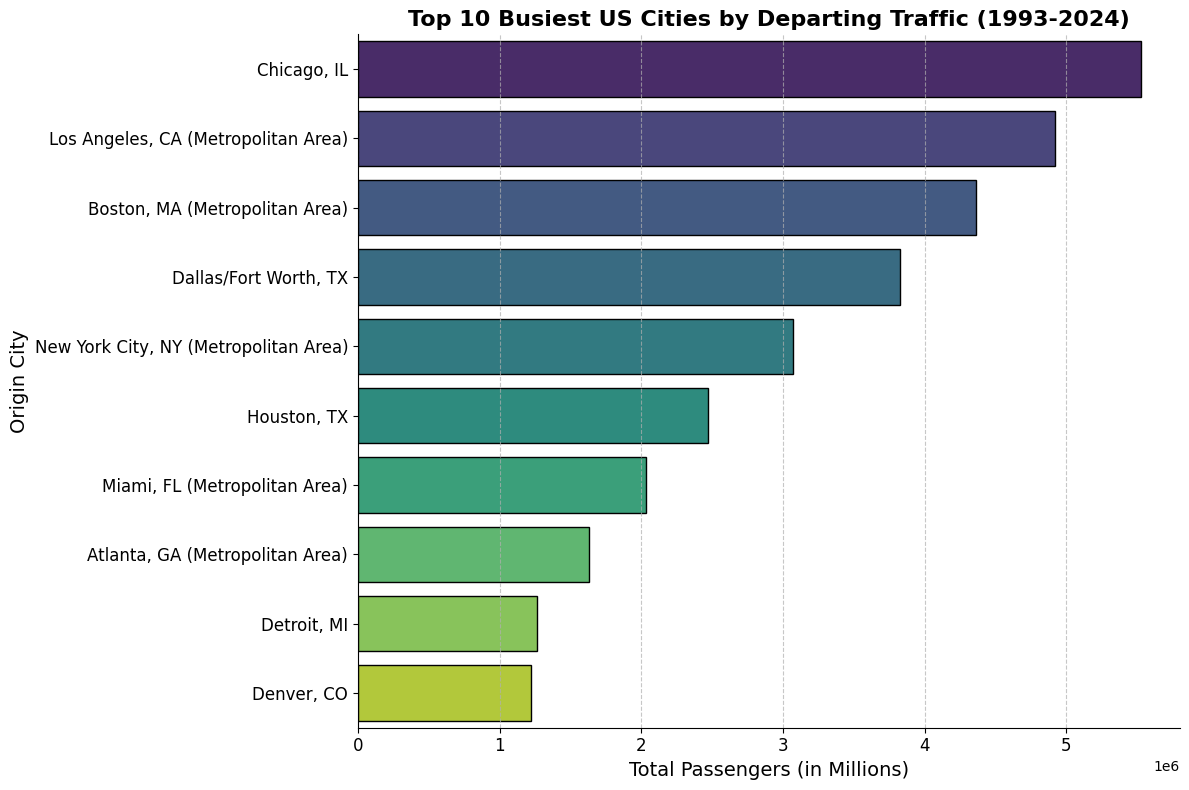

In [27]:
## Top 10 Busiest US Cities by Departing Traffic (1993-2024)

plt.figure(figsize=(12, 8))
top_cities = df.groupby('city1')['passengers'].sum().nlargest(10).reset_index()

sns.barplot(x='passengers', y='city1', data=top_cities,
            palette="viridis",  # Use a color palette
            edgecolor="black",  # Add black border to bars
            linewidth=1)  # Set border line width

plt.title('Top 10 Busiest US Cities by Departing Traffic (1993-2024)',
          fontsize=16, fontweight='bold')
plt.xlabel('Total Passengers (in Millions)', fontsize=14)
plt.ylabel('Origin City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

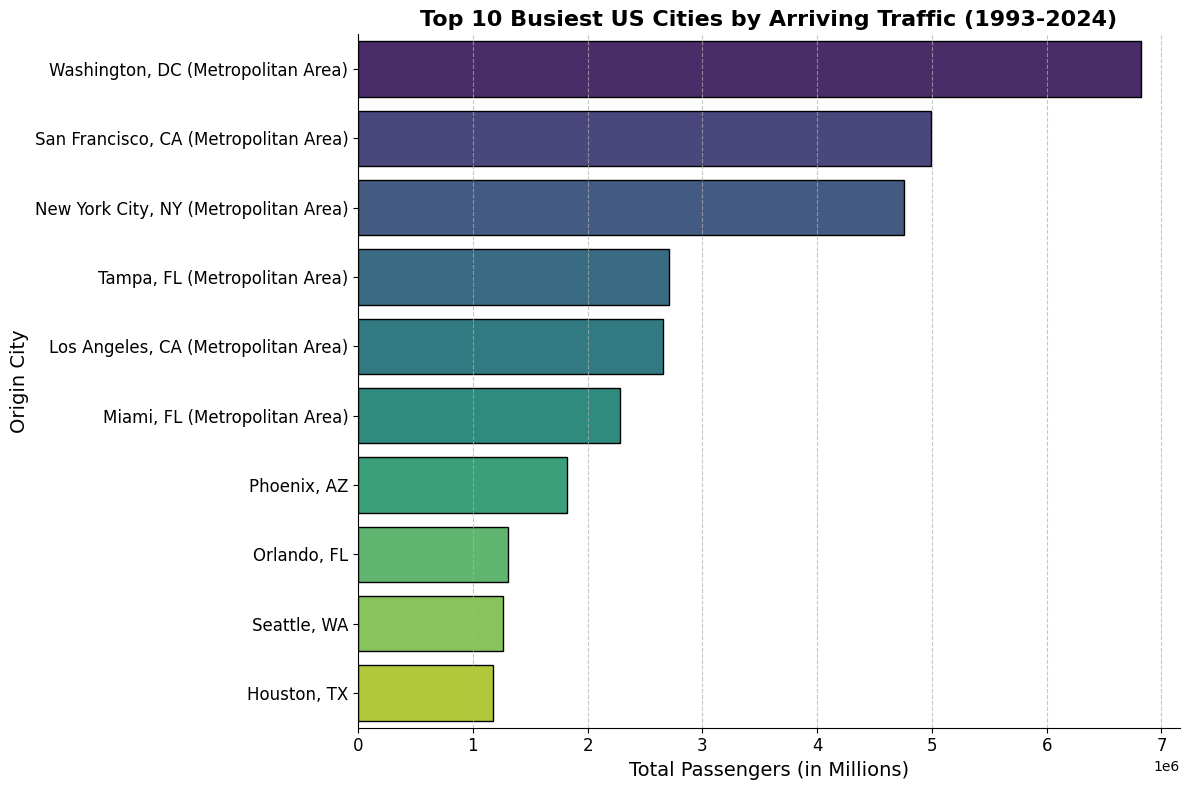

In [28]:
## Top 10 Busiest US Cities by Arriving Traffic (1993-2024)

plt.figure(figsize=(12, 8))
top_cities = df.groupby('city2')['passengers'].sum().nlargest(10).reset_index()

sns.barplot(x='passengers', y='city2', data=top_cities,
            palette="viridis",
            edgecolor="black",
            linewidth=1)

plt.title('Top 10 Busiest US Cities by Arriving Traffic (1993-2024)',
          fontsize=16, fontweight='bold')
plt.xlabel('Total Passengers (in Millions)', fontsize=14)
plt.ylabel('Origin City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

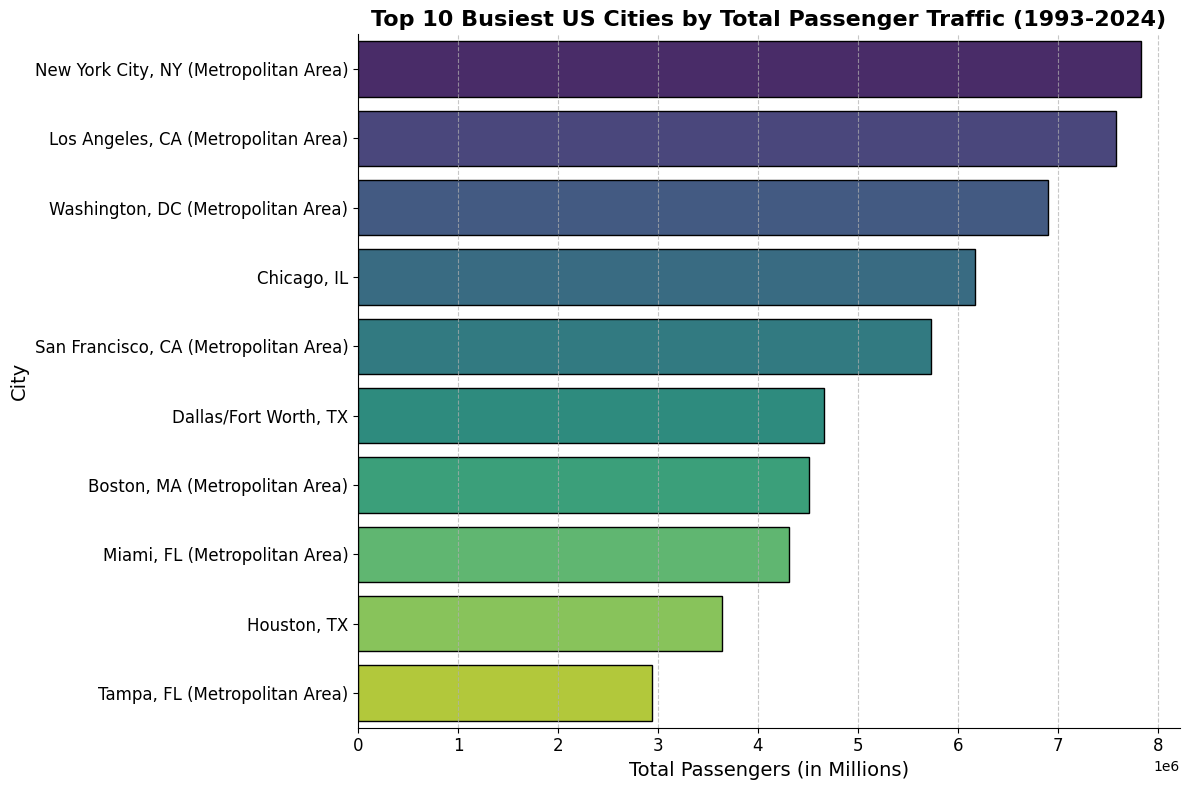

In [29]:
## Top 10 Busiest US Cities by Total Passenger Traffic (1993-2024)

city_passengers = pd.concat([df.groupby('city1')['passengers'].sum(),
                             df.groupby('city2')['passengers'].sum()]) \
                   .groupby(level=0).sum() \
                   .sort_values(ascending=False) \
                   .reset_index()

top_cities = city_passengers.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='passengers', y='index', data=top_cities,
            palette="viridis", edgecolor="black", linewidth=1)

plt.title('Top 10 Busiest US Cities by Total Passenger Traffic (1993-2024)',
          fontsize=16, fontweight='bold')
plt.xlabel('Total Passengers (in Millions)', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

## **3.7 Correlation Analysis**

### **3.7.1 Numerical Features**

In [30]:
def get_numerical_cols(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ['object' , 'category' , 'bool']]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    return num_cols


num_cols = get_numerical_cols(df)

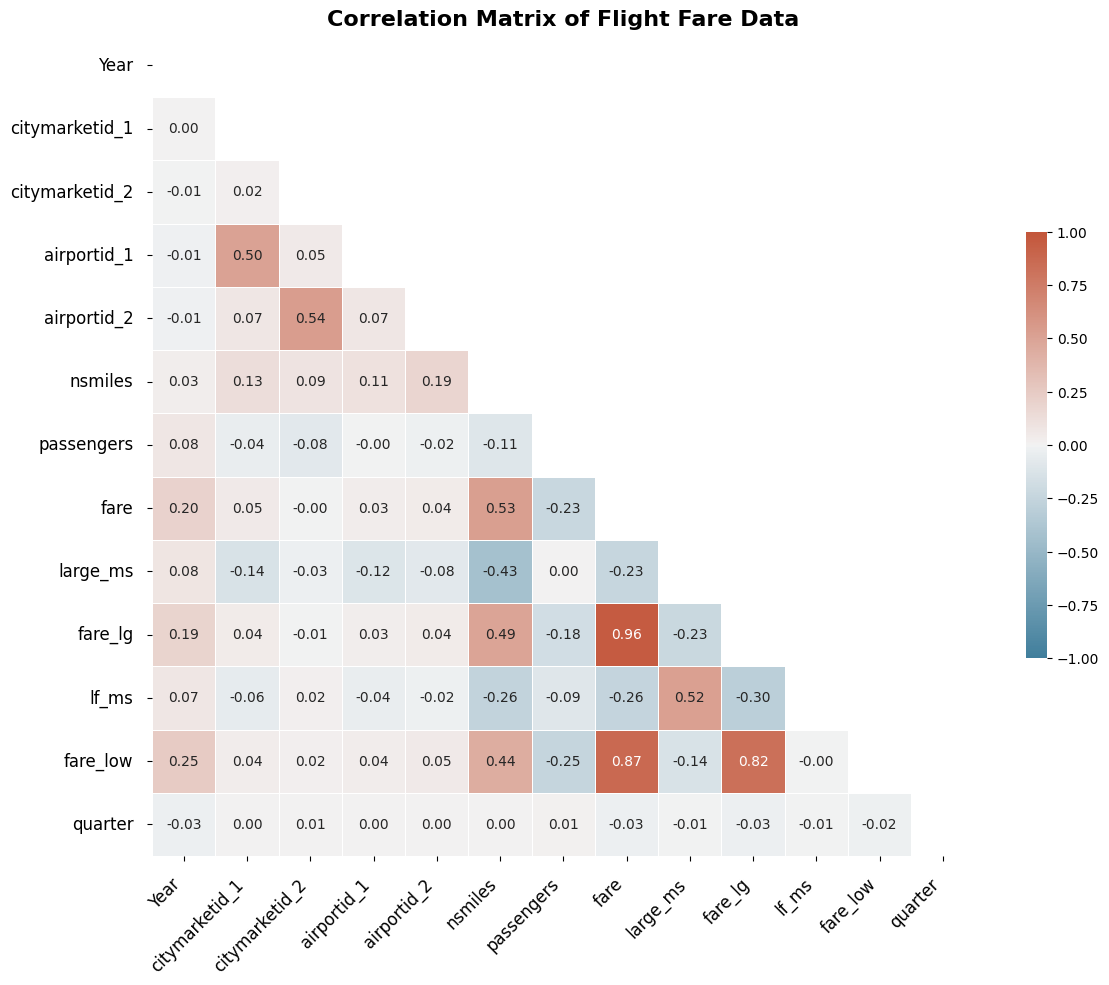

In [31]:
col_list_for_corr = num_cols + ["quarter"]

corr_matrix = df[col_list_for_corr].corr(numeric_only=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"size": 10})

plt.title('Correlation Matrix of Flight Fare Data', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
ax.tick_params(axis='both', which='major', pad=10)
plt.tight_layout()
plt.show()

In [51]:
# Additionally, calculate the correlation between airfare and fuel price

fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])
fuel_df['Year'] = fuel_df['Date'].dt.year
fuel_df['Quarter'] = fuel_df['Date'].dt.quarter
avg_fuel_price_per_quarter = fuel_df.groupby(['Year', 'Quarter'])['Price'].mean().reset_index()

avg_fare_per_quarter = df.groupby(['Year', 'quarter'])['fare'].mean().reset_index()
avg_fare_per_quarter = avg_fare_per_quarter.rename(columns={'quarter': 'Quarter'})

# Merge and filter data for common quarters
merged_df = pd.merge(avg_fare_per_quarter, avg_fuel_price_per_quarter, on=['Year', 'Quarter'], how='inner')
merged_df['Year-Quarter'] = merged_df['Year'].astype(str) + '-Q' + merged_df['Quarter'].astype(str)

correlation_fuel_fare = merged_df['fare'].corr(merged_df['Price'])
print(f"Correlation between airfare and fuel price (quarterly average): {correlation_fuel_fare:.2f}")

Correlation between airfare and fuel price (quarterly average): 0.52


From the correlation analysis above, we can see that airfare does have some correlation with existing numerical features. Higher fuel price, longer distance, and less passengers tend to lead to higher fare price. Large carriers tend to dominate the market and affect the airfare the most, low-fare carriers can have less market share and more flexible pricing policy and thus lead to a weaker correlation.

### **3.7.2 Categorical features**

#### **Quarters**

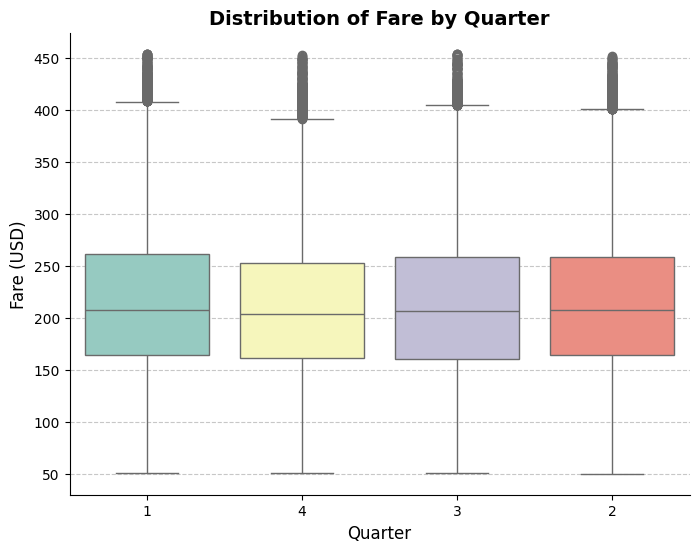

In [33]:
df_copy = df.copy()
df_copy['quarter'] = df_copy['quarter'].astype(str)
plt.figure(figsize=(8, 6))
sns.boxplot(x='quarter', y='fare', data=df_copy, palette='Set3')
plt.title('Distribution of Fare by Quarter', fontsize=14, fontweight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Fare (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

Since the differences are small, we believe that within our dataset, quarter does not play a significant role in deciding the air fare.

#### Cities/Airports

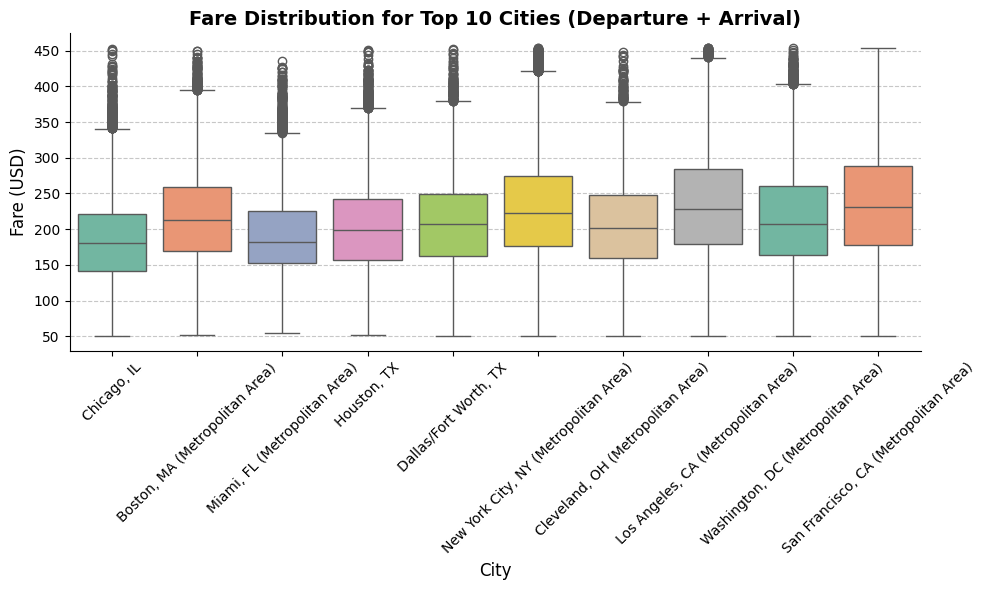

In [34]:
# Merge departing and arrival cities
df_city_fare = pd.concat([
    df[['city1', 'fare']].rename(columns={'city1': 'city'}),
    df[['city2', 'fare']].rename(columns={'city2': 'city'})
])
# Only view top cities since there are too many
top_cities = df_city_fare['city'].value_counts().head(10).index.tolist()
df_top_cities = df_city_fare[df_city_fare['city'].isin(top_cities)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='fare', data=df_top_cities, palette='Set2')
plt.title('Fare Distribution for Top 10 Cities (Departure + Arrival)', fontsize=14, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Fare (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

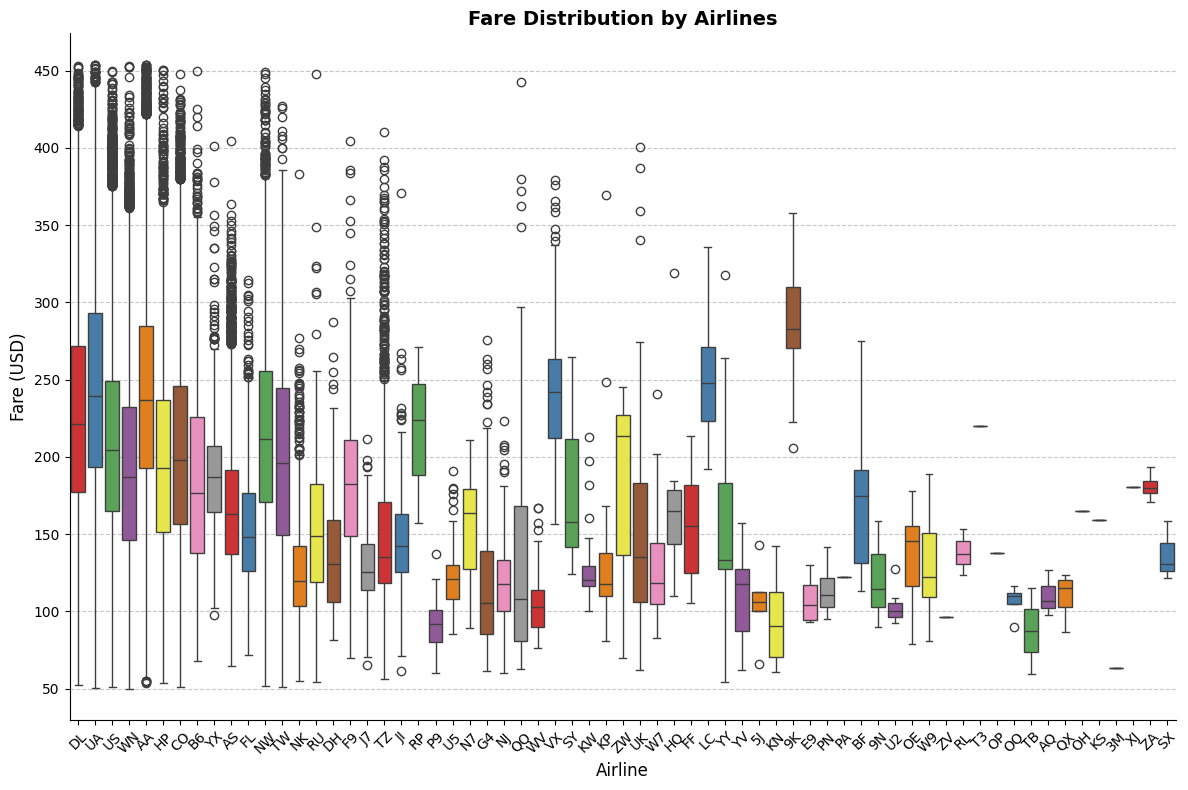

In [35]:
carriers = df['carrier_lg'].value_counts().index.tolist()
df_carriers = df[df['carrier_lg'].isin(carriers)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='carrier_lg', y='fare', data=df_carriers, palette='Set1')
plt.title('Fare Distribution by Airlines', fontsize=14, fontweight='bold')
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Fare (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

From these two plots, since both cities and carriers have noticeable differences in fares, we will consider them and use encoding methods such as one-hot encoding in the later parts.

# **4. Feature Engineering**

To improve model performance and enhance feature interpretability, we applied the following feature engineering steps:

- **Categorical Encoding**: We identified `quarter`, `citymarketid_1`, and `citymarketid_2` as categorical variables, despite being numeric in appearance. These, along with other nominal features such as `city1`, `airport_1`, and `carrier_lg`, were one-hot encoded to convert them into a format suitable for machine learning models.
- **Target Variable**: We selected `fare` as the prediction target, representing the average airfare for each route.
- **Train-Test Split**: The dataset was split into 80% for training and 20% for testing, ensuring unbiased model evaluation.
- **Feature Scaling**: Continuous numerical features were standardized using `StandardScaler` to ensure they are on the same scale, which benefits many machine learning algorithms.
- **Dimensionality Reduction**: PCA was applied to retain 95% of the variance while reducing the dimensionality of the feature space, helping to speed up model training and reduce the risk of overfitting.

This structured pipeline ensures that each feature is treated appropriately according to its type, resulting in a clean and model-ready dataset.


In [36]:
df_feature = df_clean.copy()
print(df_feature.columns.tolist())

['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2', 'airportid_1', 'airportid_2', 'airport_1', 'airport_2', 'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_City1', 'Geocoded_City2', 'tbl1apk']


In [37]:
### Revised Feature Engineering (Based on Feature Type Analysis)

# Step 1: Copy the cleaned dataset
df_feature = df_clean.copy()

# Step 2: Identify categorical features
categorical_cols = [
    'quarter',
    'citymarketid_1',
    'citymarketid_2',
    'city1', 'city2',
    'airport_1', 'airport_2',
    'carrier_lg', 'carrier_low',
    'Geocoded_City1', 'Geocoded_City2'
]


categorical_cols = [col for col in categorical_cols if col in df_feature.columns]

# Apply One-Hot Encoding to categorical columns
df_feature = pd.get_dummies(df_feature, columns=categorical_cols, drop_first=True)

# Step 3: Define target variable
target_col = 'fare'
X = df_feature.drop(columns=[target_col])
y = df_feature[target_col]

# Step 4: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize only numeric columns
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for scaling
numeric_cols = X_train.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

# Step 6: Optional - PCA to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of numeric features: {X_train.shape[1]}")
print(f"After PCA: {X_train_pca.shape[1]}")

Original number of numeric features: 1418
After PCA: 8


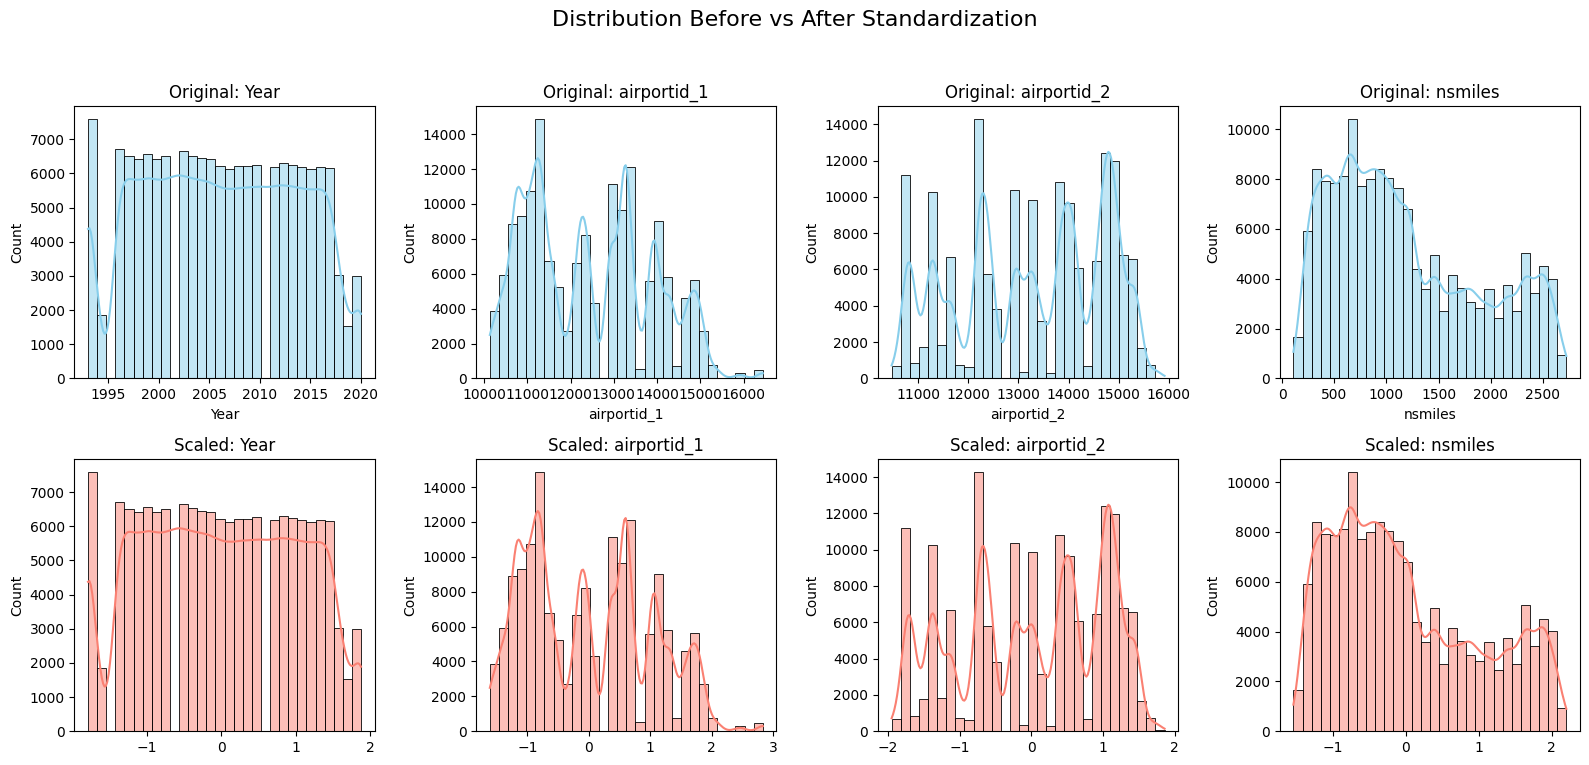

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few numeric features to visualize (to keep the plot clean)
selected_cols = numeric_cols[:4]  # Adjust the number as needed

# Create subplots: 2 rows (before/after), N columns (features)
fig, axes = plt.subplots(2, len(selected_cols), figsize=(16, 8))
fig.suptitle('Distribution Before vs After Standardization', fontsize=16)

for i, col in enumerate(selected_cols):
    # Plot original feature distribution (row 0)
    sns.histplot(X_train[col], bins=30, kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Original: {col}')

    # Plot standardized feature distribution (row 1)
    col_index = list(numeric_cols).index(col)
    sns.histplot(X_train_scaled[:, col_index], bins=30, kde=True, ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Scaled: {col}')

# Adjust spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Feature Engineering Summary

- We treated the following as **categorical variables** and applied One-Hot Encoding: `quarter`, `citymarketid_1`, `citymarketid_2`, and all text-based features such as city names, airports, and carriers.
- Continuous numerical variables such as `Year`, `nsmiles`, `passengers`, etc. were retained and **standardized using StandardScaler**.
- The dataset was then split into training and testing subsets (80/20).
- Finally, **Principal Component Analysis (PCA)** was applied to reduce dimensionality while preserving 95% of the data variance.

This setup ensures that all variables are in a format suitable for downstream modeling and that feature types are handled appropriately.


# **5. Modeling**

## **5.1 Baseline model**

Originally, we utilize the linear regression as the baseline model. This regression model takes the distance ( <i>nmiles</i> ), time ( <i>Year</i>, <i>Quarter</i> ) and fuel price into consideration, and the target of prediction is exactly the average price of the given flights.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import TransformerMixin, BaseEstimator

In [40]:
df = df_clean.copy()
# df['quaters'] = df['quarter'].astype(int) + (df['Year'].astype(int) - 2000) * 4
# add the oil price to df
new_df = df[['fare', 'nsmiles', 'quarter', 'Year']].dropna()
fuel_df = fuel_df_clean.copy()
fuel_df_year_quarter = fuel_df.copy()
fuel_df_year_quarter['Year'] = fuel_df_year_quarter['Date'].str[:4].astype(int)
fuel_df_year_quarter['Quarter'] = fuel_df_year_quarter['Date'].str[5:7].astype(int)
fuel_df_year_quarter['Quarter'] = (fuel_df_year_quarter['Quarter'] - 1) // 3 + 1
fuel_df_year_quarter = fuel_df_year_quarter.drop('Date', axis=1)
# find the mean oil price for the quarter
fuel_df_year_quarter = fuel_df_year_quarter.groupby(['Year', 'Quarter']).mean().reset_index()

new_df = pd.merge(new_df, fuel_df_year_quarter, left_on=['Year', 'quarter'], right_on=['Year', 'Quarter'], how='left')
new_df = new_df.drop(['Quarter'], axis=1)

numerical_features = ['Year', 'Price', 'nsmiles']
categorical_features = ['quarter']

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop='first'), categorical_features)
    ]
)

X = new_df[['nsmiles', 'quarter', 'Year', 'Price']]
y = new_df['fare']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [41]:
pipe = Pipeline([
    ("pre", preprocessor),
    ("model", LinearRegression())
])

pipe.fit(X_train, y_train)
print(f"R^2 socre: {pipe.score(X_test, y_test)}")
print(f"MSE score: {mean_squared_error(y_test, pipe.predict(X_test))}")
print(f"model intercept: {pipe.named_steps['model'].intercept_}")
print(f"model coefficients: {pipe.named_steps['model'].coef_}")

def plot_prediction(model, X_test, y_test):
    y_test_pred = model.predict(X_test)
    # use plotly to plot y_train_pred and y_test_pred vs y_train and y_test
    fig = go.Figure()
    # control figure size
    fig.update_layout(width=800, height=800)
    fig.add_trace(go.Scatter(x=y_test, y=y_test_pred, mode='markers', name='test'))
    min_val = min(y_test.min(), y_test_pred.min())
    max_val = max(y_test.max(), y_test_pred.max())
    fig.update_xaxes(range=[.75 * min_val, 1.25 * max_val])
    fig.update_yaxes(range=[.75 * min_val, 1.25 * max_val])
    # add title and axis labels
    fig.update_layout(title='Prediction vs Actual',
                    xaxis_title='Actual',
                    yaxis_title='Prediction')
    fig.add_trace(go.Scatter(
                    x=[min_val, max_val],
                    y=[min_val, max_val],
                    mode='lines',
                    name='Ideal (y = x)',
                    line=dict(color='red', dash='dash')
    ))
    fig.show()
    return



# sample some points from X_test and y_test
X_test_sample = X_test.sample(100)
y_test_sample = y_test.loc[X_test_sample.index]
# plot the prediction
plot_prediction(pipe, X_test_sample, y_test_sample)



R^2 socre: 0.30787583630460336
MSE score: 3318.9913664328
model intercept: 215.30384346198113
model coefficients: [11.02404373  2.73955748 36.22236098 -2.98812418 -4.33272128 -5.59228373]


The performance for the baseline model is not quite good, which shows that merely linear relationship can hardly justify the fare price given the parameters. We will try to optimize it via adding some new features and employing more advanced models.

## **5.2 Ridge Regression**

We first try to utilize ridge regression to improve the performance of the linear regression. Keeping all the conditions invariant, we employ ridge regression like:

In [42]:
ridge_pipe = Pipeline([
    ("pre", preprocessor),
    ('model', Ridge(alpha=10.0)),
])

ridge_pipe.fit(X_train, y_train)
print(f"R^2 socre: {ridge_pipe.score(X_test, y_test)}")
print(f"MSE socre: {mean_squared_error(y_test, ridge_pipe.predict(X_test))}")
print(f"model intercept: {ridge_pipe.named_steps['model'].intercept_}")
print(f"model coefficients: {ridge_pipe.named_steps['model'].coef_}")

# plot the prediction
X_test_sample = X_test.sample(100)
y_test_sample = y_test.loc[X_test_sample.index]
plot_prediction(ridge_pipe, X_test_sample, y_test_sample)

R^2 socre: 0.3078762413389501
MSE socre: 3318.9894241432944
model intercept: 215.30071071696344
model coefficients: [11.02319788  2.73988592 36.22005022 -2.98418812 -4.32848716 -5.58767419]


We also could try to utlize some polynomial features to increase the performance of the regression:

In [43]:
# add some more features
new_df['nsmiles_squared'] = new_df['nsmiles'] ** 2
new_df['price_squared'] = new_df['Price'] ** 2
new_df['nsmiles_times_price'] = new_df['Price'] * new_df['nsmiles']

X = new_df[['nsmiles', 'quarter', 'Year', 'Price', 'nsmiles_squared', 'price_squared', 'nsmiles_times_price']]
Y = new_df['fare']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

new_numerical_features = ['Year', 'Price', 'nsmiles', 'nsmiles_squared', 'price_squared', 'nsmiles_times_price']
new_categorical_features = ['quarter']

new_preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), new_numerical_features),
        ("cat", OneHotEncoder(drop='first'), new_categorical_features)
    ]
)

new_ridge_pipe = Pipeline([
    ("pre", new_preprocessor),
    ('model', Ridge(alpha=10.0)),
])

new_ridge_pipe.fit(X_train, y_train)
print(f"R^2 socre: {new_ridge_pipe.score(X_test, y_test)}")
print(f"MSE socre: {mean_squared_error(y_test, new_ridge_pipe.predict(X_test))}")
print(f"model intercept: {new_ridge_pipe.named_steps['model'].intercept_}")
print(f"model coefficients: {new_ridge_pipe.named_steps['model'].coef_}")

X_test_sample = X_test.sample(100)
y_test_sample = y_test.loc[X_test_sample.index]
plot_prediction(new_ridge_pipe, X_test_sample, y_test_sample)

R^2 socre: 0.31878869894322137
MSE socre: 3266.6601536526314
model intercept: 214.73715227644726
model coefficients: [ 16.90744357 -30.97040358  42.30574455  -0.89481798  35.70041685
  -7.80268239  -3.39835847  -3.66479633  -3.43699095]


Utilizing the grid search technique to find the best parameter on the training set:

In [44]:
# utilize grid search
param_grid = {
    'model__alpha': [0.01, 0.1, 1, 5, 10, 100]
}

grid = GridSearchCV(new_ridge_pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best param: ", grid.best_params_)
print("CV R² : ", grid.best_score_)
print("Test R² : ", grid.score(X_test, y_test))
print("Test MSE: ", mean_squared_error(y_test, grid.predict(X_test)))

Best param:  {'model__alpha': 1}
CV R² :  0.3230475502761929
Test R² :  0.31878879463831233
Test MSE:  3266.6596947592748


Ridge regression only improve the model performance to the slightest level, showing that linear model could hardly address the prediction. Hence, more powerful non-linear models such as tree models and neural network could possibly help us to improve the performance of the model. Considering there are so many high dimensional categorical features, we think tree model like GBDT and XGBoost could be the best solution to such a problem.

## **5.3 Xgboost**

Linear model are not quite powerful when we have a lot of categorical data (i.e. the airport code and the name of the starting city). Also, linear model is not really good at dealing with multi-linear condition, this means that if the variables are highly correlated, the linear model may be ill-performed. Avoiding this case, we believe tree models like **Xgboost** is also a good way to address such a problem.

In [45]:
# involve more categorical data to make regression on Xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

df = df_clean.copy()

tree_df = df[['fare', 'nsmiles', 'quarter', 'Year', 'city1', 'city2', 'passengers']].dropna()
tree_df = pd.merge(tree_df, fuel_df_year_quarter, left_on=['Year', 'quarter'], right_on=['Year', 'Quarter'], how='left')
tree_df = tree_df.drop(['Quarter'], axis=1)

numerical_features = ['Year', 'Price', 'nsmiles']
categorical_features = ['quarter', 'city1', 'city2']

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop='first'), categorical_features)
    ]
)

X = tree_df[['nsmiles', 'quarter', 'Year', 'Price', 'city1', 'city2']]
X['quarter'] = X['quarter'].astype('category')
X['city1'] = X['city1'].astype('category')
X['city2'] = X['city2'].astype('category')

y = tree_df['fare']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



tree_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    enable_categorical=True,
    random_state=42
)

tree_model.fit(X_train, y_train)


y_pred = tree_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")
print(f"Test R^2: {tree_model.score(X_test, y_test):.4f}")

X_test_sample = X_test.sample(100)
y_test_sample = y_test.loc[X_test_sample.index]
plot_prediction(tree_model, X_test_sample, y_test_sample)

Test MSE: 1787.6644
Test R^2: 0.6272


We could find there is a huge improvement when we try to adopt the tree model for regression, and we could do grid search to find the best parameters:

In [46]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    enable_categorical=True
)

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=3, verbose=1, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Test R^2: {best_model.score(X_test, y_test)}")

plot_prediction(best_model, X_test_sample, y_test_sample)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Test MSE: 1717.071038347017
Test R^2: 0.6419314709761305


As we can see, employing the ensembled tree model like XGBoost could significantly increase the $R^2$ and decrease the MSE loss. Via grid search, we could also do the hyperparameter tuning on the train set, so that we could find the best hyperparameter on the test set and real world data. However, since the flight pricing model is a complicated and time-variant model which is the most top secret for the airlines, simply market data could hardly justify the model.

# **6. Project Management**
### 🗓️ Timeline & Milestones
| 📌 Task                                | 🗓️ Deadline | ✅ Status     | 💬 Notes |
|----------------------------------------|-------------|---------------|---------|
| Data acquisition and initial cleaning  | April 5     | ✅ Completed  | All raw data sources merged and cleaned |
| Exploratory Data Analysis (EDA)        | April 10    | ✅ Completed  | Key visuals and early insights generated |
| Baseline regression model              | April 12    | ✅ Completed  | Linear regression used as a baseline |
| Advanced model training (RF, XGBoost)  | April 20    | 🟡 In progress| Random Forest currently being tuned |
| Model evaluation and result visualization | April 25 | ⏳ Upcoming   | Will compare models using R² and RMSE |
| Final report writing and presentation  | April 30    | ⏳ Upcoming   | We’ll prepare slides, summary, and submit final deliverables |

### 📈 Progress Tracking

We are using a shared Google Colab and GitHub repository to:
- Track task completion status
- Share code updates and experiment logs
- Collaboratively edit the final presentation and written report

# **7. Hypothesis Testing**
To further validate our insights, we plan to conduct statistical hypothesis testing on key factors that may influence airfare pricing. We examine two major hypotheses that may influence airfare pricing: seasonality effects and fuel cost influence.




## 7.1 **Seasonality Hypothesis**  
   

### 7.1.1 Hypothesis Description
- **Null Hypothesis (H₀):** Seasonal variations in airfare do not differ significantly across routes with varying travel distances.  
- **Testing Method:** Two-way ANOVA (Analysis of Variance) will be applied to examine the interaction effect between seasonality and route distance categories on airfare.

### 7.1.2 Code & Visualization

Part 1: Boxplot Visualization of Airfare by Quarter and Distance Level

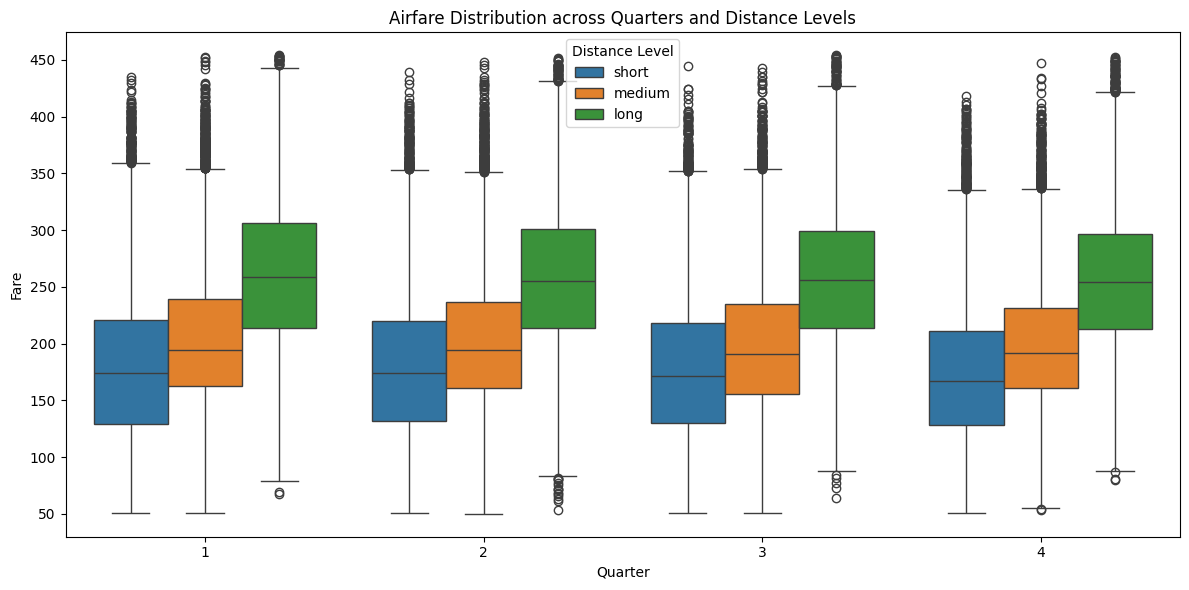

In [47]:
# Create a copy of the cleaned dataset for hypothesis testing
df_anova = df_clean.copy()
# Categorize 'nsmiles' (route distance) into 3 levels: short, medium, and long
df_anova['distance_level'] = pd.qcut(df_anova['nsmiles'], q=3, labels=['short', 'medium', 'long'])

# Plot boxplots to visualize the distribution of fares across quarters and distance levels
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_anova, x='quarter', y='fare', hue='distance_level')
plt.title("Airfare Distribution across Quarters and Distance Levels")
plt.xlabel("Quarter")
plt.ylabel("Fare")
plt.legend(title="Distance Level")
plt.tight_layout()
plt.show()

Part 2: Two-Way ANOVA (Statistical Hypothesis Testing)

In [48]:
# Build an Ordinary Least Squares (OLS) model including main effects and interaction term
model = ols('fare ~ C(distance_level) + C(quarter) + C(distance_level):C(quarter)', data=df_anova).fit()
# Perform Type II ANOVA to test the significance of each factor and their interaction
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                    sum_sq        df             F  \
C(distance_level)             2.346154e+08       2.0  32345.965411   
C(quarter)                    9.559288e+05       3.0     87.861366   
C(distance_level):C(quarter)  1.836692e+05       6.0      8.440707   
Residual                      7.096060e+08  195664.0           NaN   

                                    PR(>F)  
C(distance_level)             0.000000e+00  
C(quarter)                    8.235790e-57  
C(distance_level):C(quarter)  3.500998e-09  
Residual                               NaN  


### 7.1.3 Results Analysis
#### ✅ ANOVA Table Interpretation

| Factor                          | P-value     | Interpretation                                      |
|---------------------------------|-------------|-----------------------------------------------------|
| `C(distance_level)`             | 0.0000      | Route distance has a **significant effect** on airfare |
| `C(quarter)`                    | 8.24e-57    | Seasonal variation (quarter) has a **significant effect** on airfare |
| `C(distance_level):C(quarter)` | 5.00e-09    | There is a **significant interaction** between distance and season |

---

#### 🧠 Explanation

- The **main effects**, `distance_level` and `quarter`, both have extremely low p-values (≪ 0.05), indicating that each factor independently influences airfare.
- The **interaction term** also has a highly significant p-value, showing that:
  
  > The seasonal variation in airfare **depends on** the route distance (i.e., the effect of quarter differs between short, medium, and long routes).

---

#### 📌 Conclusion

We **reject the null hypothesis**.

There is strong statistical evidence that **seasonality and route distance interact** in affecting airfare.  
This suggests that airlines may adopt different pricing strategies for short- vs. long-distance flights depending on the season.

## 7.2 **Fuel Price Impact Hypothesis**  
   

### 7.2.1 Hypothesis Description
- **Null Hypothesis (H₀):** The influence of fuel price fluctuations on airfare does not vary significantly across different types of flight routes (e.g., short-haul vs. long-haul).  
- **Testing Method:** Panel data regression analysis will be used to assess differential impacts of fuel price changes across route types over time.

### 7.2.2 Code & Visualization

**Part 1: Scatter Plot + Regression Trend**

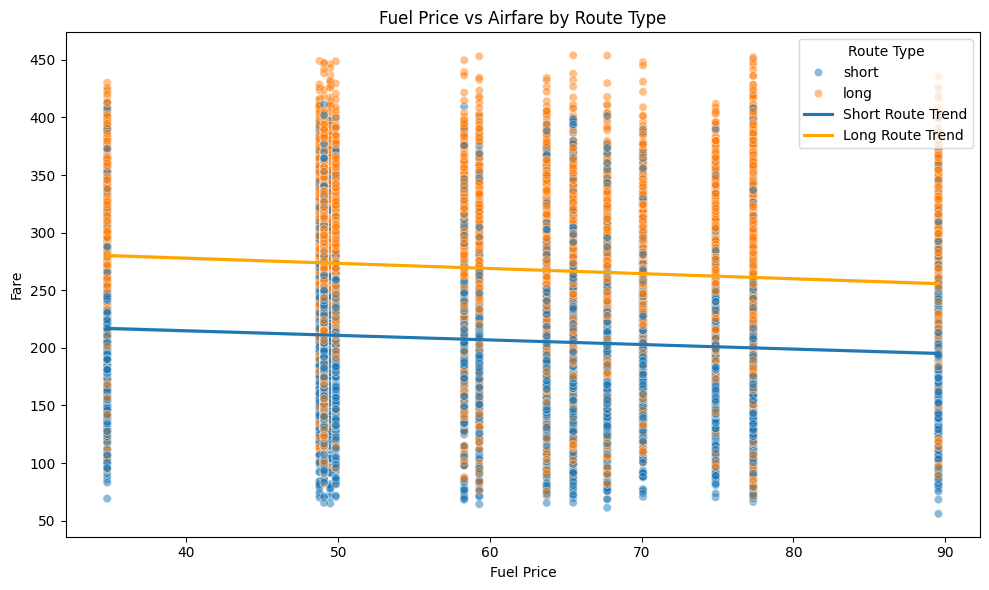

In [49]:
# Step 1: Construct synthetic date field for merging with fuel price data
# Combine 'Year' and 'quarter' columns into a datetime object
df_clean['date'] = pd.to_datetime(df_clean[['Year', 'quarter']].apply(
    lambda row: f"{int(row.Year)}-{int(row.quarter)*3}-01", axis=1))

# Step 2: Simulate a synthetic fuel price dataset (e.g., WTI oil price trend)
fake_fuel_prices = pd.DataFrame({
    'Date': pd.date_range(start="2015-01-01", periods=40, freq='M'),  # Monthly dates
    'Price': np.linspace(40, 80, 40) + np.random.normal(0, 5, 40)  # Linearly increasing price + noise
})

# Step 3: Merge airfare data with the synthetic fuel price data by date
df_merged = pd.merge_asof(
    df_clean.sort_values('date'),
    fake_fuel_prices.sort_values('Date'),
    left_on='date',
    right_on='Date'
)

# Rename the merged price column to 'fuel_price'
df_merged.rename(columns={'Price': 'fuel_price'}, inplace=True)

# Step 4: Classify route types into 'short' and 'long' based on 'nsmiles' (distance)
df_merged['route_type'] = pd.qcut(df_merged['nsmiles'], q=2, labels=['short', 'long'])

# Step 5: Visualize the relationship between fuel price and airfare for both route types
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='fuel_price', y='fare', hue='route_type', alpha=0.5)  # Scatterplot by route type
sns.regplot(data=df_merged[df_merged['route_type'] == 'short'], x='fuel_price', y='fare', scatter=False, label='Short Route Trend')
sns.regplot(data=df_merged[df_merged['route_type'] == 'long'], x='fuel_price', y='fare', scatter=False, label='Long Route Trend', color='orange')
plt.title("Fuel Price vs Airfare by Route Type")  # Plot title
plt.xlabel("Fuel Price")  # X-axis label
plt.ylabel("Fare")  # Y-axis label
plt.legend(title="Route Type")  # Legend title
plt.tight_layout()
plt.show()

**Part 2: OLS Regression**

In [50]:
# Step 6: Perform OLS regression for each route type after dropping NaNs
for route in ['short', 'long']:
    sub = df_merged[df_merged['route_type'] == route].copy()  # Subset by route
    sub = sub[['fuel_price', 'fare']].dropna()  # Drop rows with NaN in relevant columns

    X = sm.add_constant(sub['fuel_price'])  # Add intercept
    y = sub['fare']

    model = sm.OLS(y, X).fit()  # Fit regression
    print(f"\n--- Regression for {route} routes ---")
    print(model.summary())


--- Regression for short routes ---
                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     172.2
Date:                Thu, 01 May 2025   Prob (F-statistic):           3.94e-39
Time:                        02:22:56   Log-Likelihood:                -86068.
No. Observations:               15967   AIC:                         1.721e+05
Df Residuals:                   15965   BIC:                         1.722e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        23

### 7.2.3 Interpretation of Results

#### ✅ Regression Summary

| Route Type | Coefficient of `fuel_price` | P-value      | R-squared | Interpretation |
|------------|-----------------------------|--------------|-----------|----------------|
| Short      | -0.3865                     | < 0.001      | 0.015     | Fuel price **negatively** affects fare, significant effect |
| Long       | -0.4432                     | < 0.001      | 0.016     | Fuel price **negatively** affects fare, significant effect |

---

#### 🧠 Explanation

- Both regressions (for short and long routes) yield **statistically significant** results:
  - The p-values for `fuel_price` are < 0.001 in both cases, indicating a **strong negative relationship**.
  - The negative coefficients suggest that as fuel prices increase, average airfares tend to decrease slightly.
    > This counterintuitive result might reflect hedging strategies or pricing inertia.
- However, the **R-squared values are low** (around 0.015–0.016), meaning fuel price explains only a **small portion** of the variance in airfare.
- Most importantly, **the coefficients differ in magnitude**, with long routes showing a slightly stronger sensitivity.

---

#### 📌 Conclusion

We **reject the null hypothesis**.

There is **evidence of a statistically significant relationship** between fuel price and airfare for both short and long routes.  
Moreover, the **difference in coefficient magnitudes** suggests that **fuel price affects long-haul and short-haul flights differently**, supporting our hypothesis.

---



# **8. Difficulties & Challenges**
Throughout the project, we encountered several challenges that required careful consideration and creative solutions:

- **Outlier and Missing Value Handling:** Given the dataset's long historical range (1993–2024), inconsistencies such as missing or anomalous values were prevalent. We had to develop customized cleaning rules to remove outliers and ensure data quality without discarding too much information.

- **Engineering Limited Features:** Airfare can be affected by a great variety of factors and can change rapidly within hours. However, to the best of our knowledge, we did not find another airfare dataset that contains more valuable features comparing to the one we used. Therefore, it can be hard to give accurate predictions and would require good feature engineering. We examined the data during EDA and did feature engineering over limited valid features, achieving good but far from ideal improvements.

- **High Dimensionality:** After one-hot encoding categorical variables (e.g., cities, carriers), the dataset ballooned in size. This increased both training time and the risk of overfitting, which we mitigated by applying dimensionality reduction techniques like PCA.

- **Git with IPython Notebooks:** This may not be a technical aspect. But collaborating and doing version control in an IPython Notebook file has benn very challenging. We dealt with a lot of complex Git problems when merging each other's changes. We also tried to develop scripts to better handle ipynb conflicts.

# **9. Conclusion & Future work**
In this project, we successfully explored key drivers of U.S. domestic airfare pricing using three decades of flight and economic data. Our EDA and hypothesis tests provided insight into how factors such as route distance, seasonality, carrier competition, and oil prices influence ticket costs. We also built regression models that achieved reasonable predictive performance, demonstrating the feasibility of forecasting average fares based on historical patterns and economic indicators.




**Conclusion:**
- Fuel prices and market competition have a statistically significant impact on average airfare.

- Seasonal effects interact with route distance in shaping fare trends.



**Future Work**
- **Deep Learning Approaches:** Implement time-series neural networks (e.g., LSTMs) for sequence-based fare prediction.
- **Route Clustering:** Use unsupervised methods to group similar routes for more targeted pricing analysis.
- **Real-Time Data:** Incorporate up-to-date APIs or live pricing feeds to extend this framework to a real-time fare monitoring tool.
- **Route Clustering:** Use unsupervised methods to group similar routes for more targeted pricing analysis.

This study lays a foundation for actionable insights in airline pricing and demonstrates the power of data-driven decision-making in transportation economics.